In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [116]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data import load_cd_data_24x128, load_cell_cycle_data

out_dir = 'output/cadmium_24x128_random_orfs_simple_hybrid_20220613_c898'
config_path = f'{out_dir}/config'

config = importlib.import_module(f"{config_path.replace('/', '.')}")
vit = load_model_config(config)
vit_data = load_cd_data_24x128()

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG,
                           indices_path=f"{out_dir}/indices.csv")
print(dataloader.split_repr())

Split: hybrid,0.1; Training: 22362; Validation: 1990; Testing: 2210


In [117]:
trainer = ViTTrainer(vit, 'none',
                     dataloader, resume=True, resume_path=out_dir)

In [118]:
trainer.dataloader.split_repr()

'Split: hybrid,0.1; Training: 22362; Validation: 1990; Testing: 2210'

In [119]:
trainer.setup()

Resuming from 360...


In [120]:
trainer.compute_predictions_losses()

In [121]:
print(trainer.perf_str)

Loss:
  Train:	0.630
  Valid:	0.813
  Test: 	0.879

R2:
  Train:	0.375
  Valid:	0.069
  Test: 	0.147


0

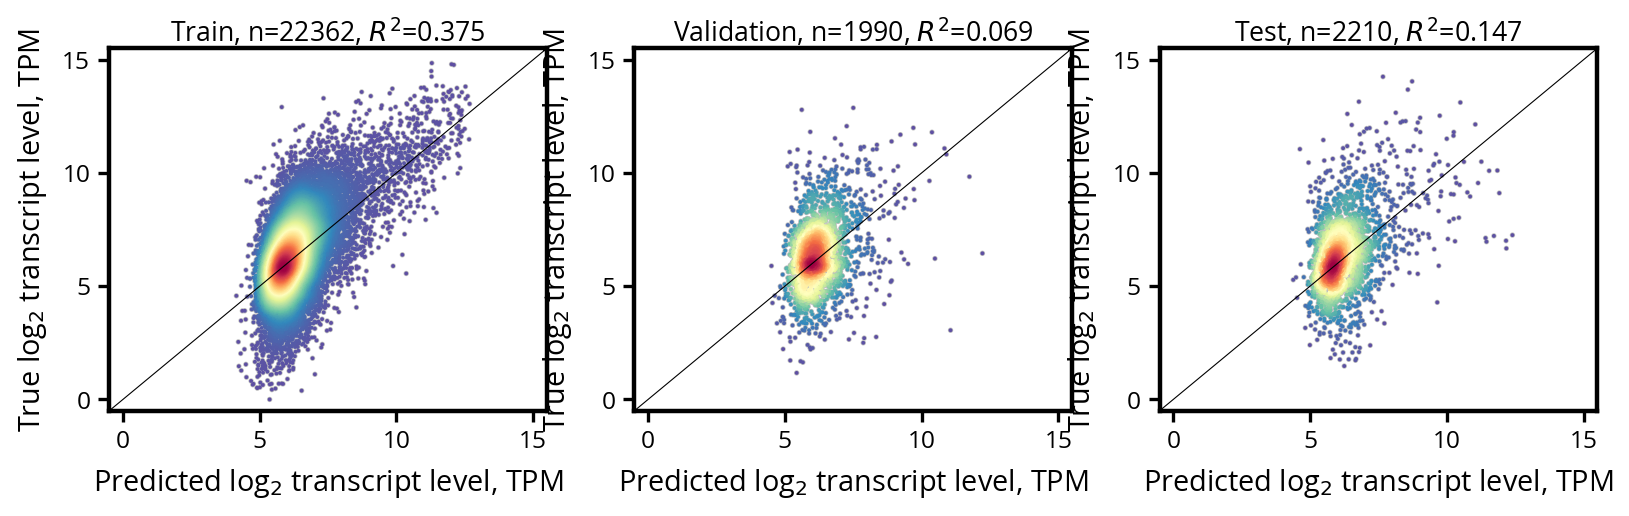

In [122]:
trainer.plot_predictions()
0

0

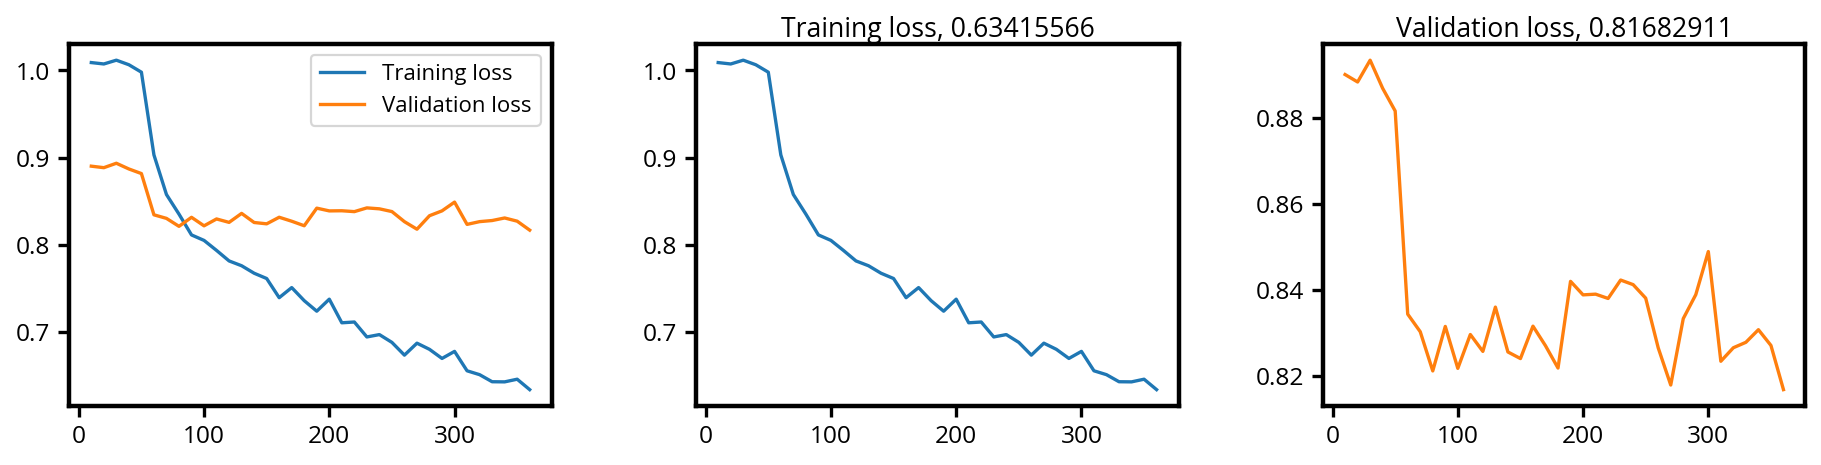

In [123]:
from src.vit_train import plot_loss_progress

loss_df = pd.read_csv(trainer.loss_path)

plot_loss_progress(loss_df.head(100), 100)
0

In [124]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()


In [125]:
np.argmax(dataloader.testloader.dataset[:][1])

dataloader.testloader.dataset[2006]

(tensor([[[-1.0000, -1.0000, -1.0000,  ..., -0.9739, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9159, -0.9997, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9283, -0.9868, -1.0000],
          ...,
          [-1.0000, -1.0000, -0.9457,  ..., -0.8889, -0.8492, -0.9982],
          [-0.9985, -1.0000, -0.9981,  ..., -0.9887, -0.9306, -0.9996],
          [-0.9383, -0.9999, -1.0000,  ..., -0.9996, -0.9919, -0.9937]]],
        dtype=torch.float64),
 4.5668989851187956,
 'YKL152C',
 11.0,
 120.0)

0

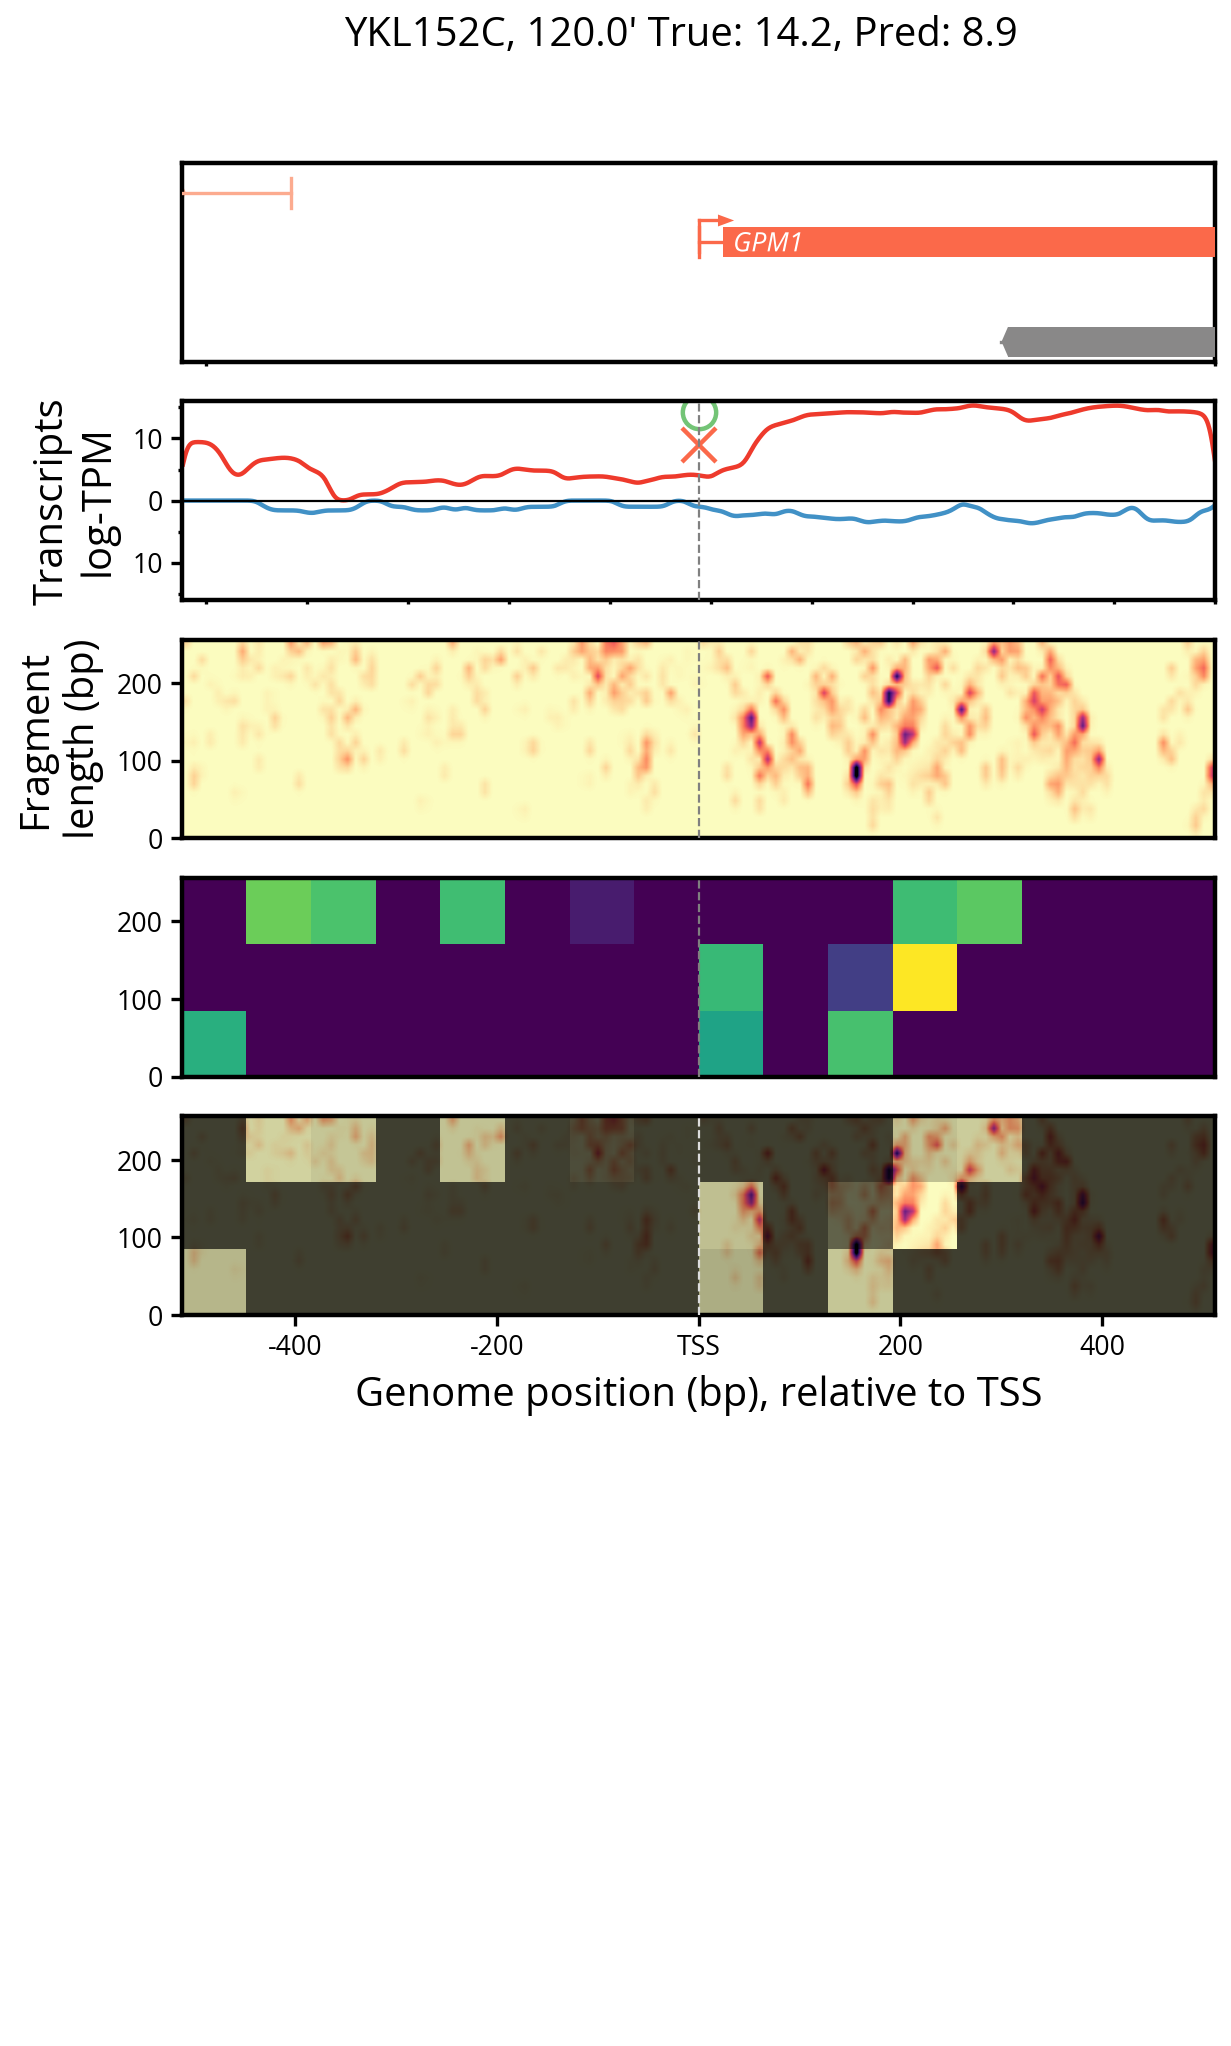

In [126]:
from src.vit_viz import plot_gene_prediction

plot_gene_prediction('YKL152C', 120.0, trainer.vit, trainer.dataloader.dataset,
    orf_plotter=orf_plotter, rna_plotter=rna_plotter)
0

In [145]:
test = vit.state_dict().copy()

In [146]:
test

OrderedDict([('patches.0.cls_token',
              tensor([[[-0.2207, -1.4191,  0.0469, -0.6316,  0.8651, -0.2189, -0.9309,
                        -0.1774]]])),
             ('patches.0.positions',
              tensor([[ 1.8663, -0.3979,  1.0025, -1.3440,  0.9128,  0.3057,  0.1628, -1.0562],
                      [-0.1768,  0.7371, -0.2617,  0.5591,  0.8980,  0.6262, -0.5244,  0.8841],
                      [ 0.1937,  0.5949,  0.4324,  0.4188,  1.0565, -1.1652, -1.6822,  1.6847],
                      [-0.3205,  0.2727,  1.6412,  0.7819, -0.5435,  2.3507, -0.7616, -0.0557],
                      [-0.2378,  0.5401, -1.5221,  1.2267, -0.0391,  0.1690,  1.3536, -1.9105],
                      [ 1.3847, -0.5999,  0.1513,  0.1358, -0.8672, -1.4274, -0.6911, -0.1555],
                      [-0.3766, -0.0190, -0.0546, -0.2926,  1.2683, -0.1976, -1.8282, -0.6147],
                      [-0.6624, -0.9646, -0.1789, -0.3472,  1.0479,  0.2386, -0.5780,  0.1384],
                      [ 1.4538,  